## Fashion MNIST 데이터 다운로드

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('Train data:', train_images.shape, train_labels.shape)
print('Test data:', test_images.shape, test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
Train data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## 데이터 프리뷰

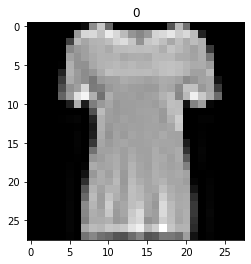

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images[10], cmap='gray')
plt.title(train_labels[10])
plt.show()

In [4]:
# 여러개의 이미지 데이터 시각화
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    random_idx = np.random.choice(len(images), size=ncols)
    for i in range(ncols):
        axes[i].imshow(images[random_idx[i]], cmap='gray')
        axes[i].set_title(class_names[labels[random_idx[i]]])        

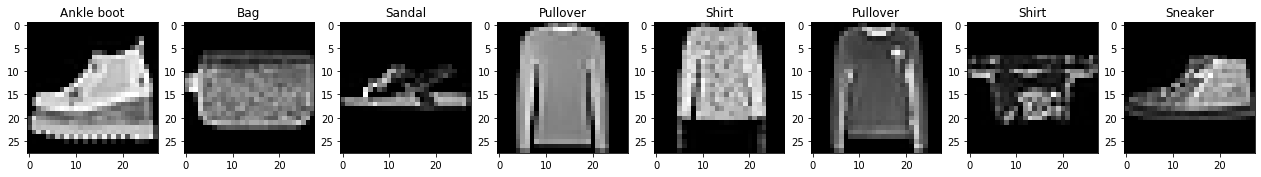

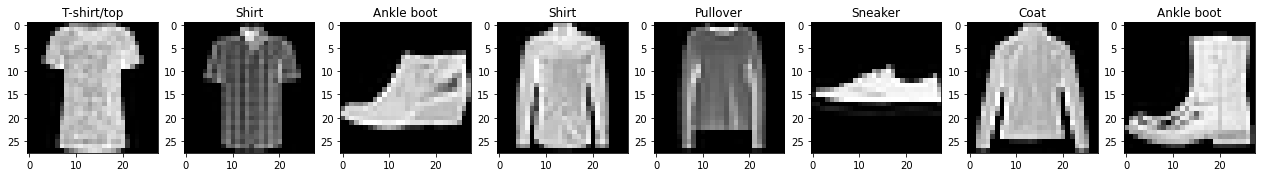

In [5]:
import numpy as np
import pandas as pd

show_images(train_images, train_labels, ncols=8)
show_images(test_images, test_labels, ncols=8)

## 데이터 전처리 수행
- 픽셀값 정규화

In [6]:
def preprocess_images(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = preprocess_images(train_images, train_labels)
test_images, test_labels = preprocess_images(test_images, test_labels)

print('Train data(normalized):', train_images.shape, train_labels.shape)
print('Test data(normalized):', test_images.shape, test_labels.shape)

Train data(normalized): (60000, 28, 28) (60000,)
Test data(normalized): (10000, 28, 28) (10000,)


## tf.keras로 Dense Layer 모델 설계


In [7]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

input_size = train_images.shape[1]

model = Sequential([
    Flatten(input_shape=(input_size, input_size)),
    Dense(150, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                4530      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 122,590
Trainable params: 122,590
Non-trainable params: 0
_________________________________________________________________


## 설계한 모델 컴파일 후 학습시키기

In [8]:
# compile단계: Loss 함수, Optimizer, 성능 측정 metric 설정
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# One-hot 인코딩 포맷인 레이블 -> categorical_crossentropy
# One-hot 인코딩 포맷이 아닌 레이블 -> sparse_categorical_crossentropy

model.compile(optimizer=Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
# 레이블 One-hot 인코딩 포맷으로 만들어주기 -> to_categorical 메소드 사용
from tensorflow.keras.utils import to_categorical

print('변경 전:', train_labels.shape, test_labels.shape)

train_ohe_labels = to_categorical(train_labels)
test_ohe_labels = to_categorical(test_labels)

print('변경 후:', train_ohe_labels.shape, test_ohe_labels.shape)

변경 전: (60000,) (10000,)
변경 후: (60000, 10) (10000, 10)


In [10]:
# fit 단계: 학습시키기(X,y 데이터 설정, epoch, batch_size 설정)
# Loss, Accuracy 반한됨
history = model.fit(x=train_images, y=train_ohe_labels,
                   batch_size=128, epochs=20, verbose=True)

Epoch 1/20
469/469 [==============================] - 3s 3ms/step - loss: 0.7639 - accuracy: 0.7318
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8507
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8685
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8749
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8803
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.8816
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.8854
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8871
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8869
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8893

## 테스트 데이터로 예측
- ``predict()``인자로 들어가야 할 인풋 shape는 설계 시 모델에 입력시킨 즉, ``fit()``인자에 들어간 인풋 shape가 동일해야 함!

In [11]:
# predict하면 softmax 확률값으로 반환됨

pred_proba = model.predict(test_images)
print(pred_proba.shape)
print(pred_proba[0][:])

(10000, 10)
[2.1566296e-11 1.1407915e-16 1.6851777e-15 1.0803363e-14 1.9545963e-13
 3.2255446e-04 1.3433897e-11 6.8272545e-04 3.5945408e-08 9.9899477e-01]


- 테스트 데이터 1개만 예측해보기 -> 차원 1개 늘려주어야 함! (batch_size, width, height) shape로 만들기 위함

In [12]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax probablity:', pred_proba, pred_proba.shape)

# argmax할 때, 1차원으로 줄여주기 위해서 squeeze이용 -> 축 인자로 안넣어주면 1차원으로 축소함
pred_label = np.argmax(np.squeeze(pred_proba, axis=0))
print('predicted class value:', pred_label)

softmax probablity: [[2.1566296e-11 1.1407915e-16 1.6851777e-15 1.0803363e-14 1.9545925e-13
  3.2255478e-04 1.3433897e-11 6.8272569e-04 3.5945408e-08 9.9899477e-01]] (1, 10)
predicted class value: 9


## 테스트 데이터 모델 성능 검증
- ``evaluate()`` 사용

In [13]:
evaluation = model.evaluate(test_images, test_ohe_labels, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.3899 - accuracy: 0.8725


In [14]:
evaluation # Loss, Accuracy 담겨 있음

[0.3898962438106537, 0.8725000023841858]

## 검증 데이터로 모델 성능 검증
- ``fit()``메소드를 활용해서 검증 데이터를 넣어줄 수 있음
- 검증 데이터로 검증하면서 학습률 같은 파라미터 조정할 수 없어서 이를 가능토록하기 위해 Callback 함수 사용가능함(이에 대해서는 추후에 배움)

In [15]:
# 다시 Fashion MNIST 데이터 로드
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 픽셀값 스케일링
def preprocess_images(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = preprocess_images(train_images, train_labels)
test_images, test_labels = preprocess_images(test_images, test_labels)
print('Train:', train_images.shape, train_labels.shape)
print('Test:', test_images.shape, test_labels.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [16]:
# sklearn 메소드 이용해서 학습 데이터에서 학습/검증 데이터로 분할
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)
print('Train:', train_images.shape, train_labels.shape)
print('Validation:', val_images.shape, val_labels.shape)

Train: (51000, 28, 28) (51000,)
Validation: (9000, 28, 28) (9000,)


In [17]:
# One-hot 인코딩 형태로 변환
train_ohe_labels = to_categorical(train_labels)
val_ohe_labels = to_categorical(val_labels)
print('Train labels(OHE):', train_ohe_labels.shape)
print('Valid labels(OHE):', val_ohe_labels.shape)

Train labels(OHE): (51000, 10)
Valid labels(OHE): (9000, 10)


In [18]:
# 검증 데이터로 학습 수행
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

input_size= 28
model = Sequential([
    Flatten(input_shape=(input_size, input_size)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

# compile -> Loss, optimizer, metric 설정
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy', metrics=['accuracy'])

# 설계한 모델 구조 출력
model.summary()

# 검증 데이터 추가해서 학습 -> Train X,y / Valid X,y / epoch / batch_size 설정
history = model.fit(x=train_images, y=train_ohe_labels, batch_size=128, epochs=20,
                   validation_data=(val_images, val_ohe_labels))
## 참고로 위에서 sklearn으로 Train/Validation 안나누고 fit 메소드 안에서 validation_split 인자로 넣어줄 수도 있긴 함!

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
399/399 [==============================] - 2s 5ms/step - loss: 0.8842 - accuracy: 0.6932 - val_loss: 0.4563 - val_accuracy: 0.8417
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8471 - val_

In [19]:
# history 객체에 Train Loss/Acc, Validation Loss/Acc 모두 담겨 있음
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

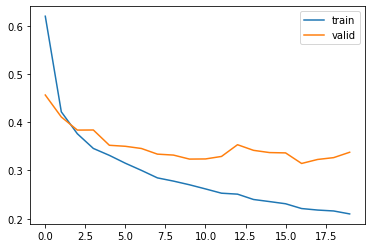

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

# tf.keras의 Functional API

- 그동안 위에서 사용한 것은 tf.keras의 Sequential API로 모델을 설계한 거였음. 
- tf.keras의 가장 핵심적인 부분은 Functional API임!
    - 해당 메소드가 더 자유도가 높고 여러가지 복잡한 모델 설계가 가능함

### 기존의 Sequential API

In [21]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

input_size = 28

# 1번째 Sequential API 형태
model = Sequential([
    Flatten(input_shape=(input_size, input_size)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 2번째 Sequential API 형태
model = Sequential()
model.add(Flatten(input_shape=(input_size, input_size)))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Functional API 형태
- tf.keras.models의 Model 임포트해야 함
- Sequential API는 인풋 레이어가 나오지 않는 반면, Functional API는 인풋 레이어를 따로 만들어주기 때문에 인풋 레이어도 명시적으로 나옴!

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense

input_size = 28

input_tensor = Input(shape=(input_size, input_size), name='Input')
x = Flatten(name='Flatten')(input_tensor)
x = Dense(100, activation='relu', name='Dense1')(x)
x = Dense(30, activation='relu', name='Dense2')(x)
output = Dense(10, activation='softmax', name='Softmax')(x)

# Model 모듈에 위에서 설계한 input, output 넣어주기
model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
Dense2 (Dense)               (None, 30)                3030      
_________________________________________________________________
Softmax (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Dense Layer 커스터마이징하기

In [24]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        # Weight 생성 후 초기화
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units, ),
                                 initializer='random_normal', trainable=True)
        
    # __call__ 이라는 매직메소드 정의
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    
inputs = Input(shape=(4, ))
outputs = CustomDense(units=10)(inputs)   # (inputs) 부분이 CustomDense의 call 매직메소드 의미

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
custom_dense (CustomDense)   (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [25]:
model = Sequential([
    Input((4, )),
    CustomDense(10),
    CustomDense(3),
    tf.keras.layers.ReLU()
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_dense_1 (CustomDense) (None, 10)                50        
_________________________________________________________________
custom_dense_2 (CustomDense) (None, 3)                 33        
_________________________________________________________________
re_lu (ReLU)                 (None, 3)                 0         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [26]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
    # 첫 레이어는 인풋 레이어로 생성
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # 두번째 레이어부터 Dense Layer 생성 -> CustomDense는 call 매직메소드로 인풋 집어넣기 가능
    else:
        callable_inputs = layer(callable_inputs)

# 마지막 layer = output 레이어임
outputs = callable_inputs 
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
custom_dense_3 (CustomDense) (None, 10)                50        
_________________________________________________________________
custom_dense_4 (CustomDense) (None, 8)                 88        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8)                 0         
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


# 앞에서 배운 내용 복습

In [27]:
# 데이터 로드
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [29]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 로드 및 전처리 클래스 생성
class PreprocessData:
    def __init__(self, val_size, random_state):
        self.val_size = val_size
        self.random_state = random_state
        
    def load_data(self):
        (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
        
        return train_images, train_labels, test_images, test_labels
        
    def scaling_images(self, images, labels):
        images = np.array(images/255., dtype=np.float32)
        labels = np.array(labels, dtype=np.float32)
        
        return images, labels
    
    def split_train_val(self, train_images, train_labels):
        train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=self.val_size, random_state=self.random_state)
        
        return train_images, val_images, train_labels, val_labels
    
    def execute_all(self):
        # load data
        train_images, train_labels, test_images, test_labels = self.load_data()
        # scaling pixel
        train_images, train_labels = self.scaling_images(train_images, train_labels)
        test_images, test_labels = self.scaling_images(test_images, test_labels)
        # split Train/Validation
        train_images, val_images, train_labels, val_labels = self.split_train_val(train_images, train_labels)
        # apply One-hot encdoing to Y variable
        train_ohe_labels = to_categorical(train_labels)
        val_ohe_labels = to_categorical(val_labels)
        test_ohe_labels = to_categorical(test_labels)
        
        print('Train:', train_images.shape, train_ohe_labels.shape)
        print('Validation:', val_images.shape, val_ohe_labels.shape)
        print('Test:', test_images.shape, test_ohe_labels.shape)
        
        return train_images, train_ohe_labels, val_images, val_ohe_labels, test_images, test_ohe_labels
    
preprocess_data = PreprocessData(val_size=0.15, random_state=42)
train_images, train_ohe_labels, val_images, val_ohe_labels, test_images, test_ohe_labels = preprocess_data.execute_all()

Train: (51000, 28, 28) (51000, 10)
Validation: (9000, 28, 28) (9000, 10)
Test: (10000, 28, 28) (10000, 10)


In [31]:
# 모델 설계
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


input_size = 28

input_tensor = Input(shape=(input_size, input_size))
x = Flatten()(input_tensor)
x = Dense(units=100, activation='relu')(x)
x = Dense(units=30, activation='relu')(x)
output = Dense(units=10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

# compile -> optimizer, Loss, metric 설정
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# fit -> X,y, batch_size, epoch, validation data 설정
history = model.fit(x=train_images, y=train_ohe_labels,
                    batch_size=128, epochs=20, validation_data=(val_images, val_ohe_labels))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.8560 - accuracy: 0.7192 - val_loss: 0.4927 - 

In [33]:
# 테스트 데이터로 모델 최종 테스트
test_hist = model.evaluate(x=test_images, y=test_ohe_labels,
                          batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.8725


# Callback 함수들
#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [41]:
def create_model():
    input_size = 28
    input_tensor = Input(shape=(input_size, input_size))
    x = Flatten()(input_tensor)
    x = Dense(units=100, activation='relu')(x)
    x = Dense(units=30, activation='relu')(x)
    output = Dense(units=10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    return model

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(Adam(0.001), loss='categorical_crossentropy',
             metrics=['accuracy'])
# Callback 함수 정으
mc_call = ModelCheckpoint(filepath='/kaggle/working/save_models/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
                          monitor='val_loss', save_weights_only=True, save_best_only=True,
                          mode='min', period=3, verbose=1)
# fit
history = model.fit(x=train_images, y=train_ohe_labels,
                   batch_size=128, epochs=30, validation_data=(val_images, val_ohe_labels),
                   callbacks=[mc_call])

Epoch 1/30
399/399 [==============================] - 2s 4ms/step - loss: 0.8441 - accuracy: 0.7079 - val_loss: 0.4825 - val_accuracy: 0.8337
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4234 - accuracy: 0.8488 - val_loss: 0.4032 - val_accuracy: 0.8591
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3666 - accuracy: 0.8693 - val_loss: 0.3701 - val_accuracy: 0.8678

Epoch 00003: val_loss improved from inf to 0.37008, saving model to /kaggle/working/save_models/weights.03-0.37.hdf5
Epoch 4/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8780 - val_loss: 0.3566 - val_accuracy: 0.8739
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3262 - accuracy: 0.8825 - val_loss: 0.3479 - val_accuracy: 0.8767
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3151 - accuracy: 0.8852 - val_loss: 0.3594 - val_accuracy: 0.8694

Epoch 00006: val_loss improve

#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [49]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy',
             metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                          patience=10, verbose=1, mode='max')
model.fit(x=train_images, y=train_ohe_labels, batch_size=128,
         epochs=30, validation_data=(val_images, val_ohe_labels),
         callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 2s 4ms/step - loss: 0.8300 - accuracy: 0.7171 - val_loss: 0.4777 - val_accuracy: 0.8344
Epoch 2/30
399/399 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.8499 - val_loss: 0.4132 - val_accuracy: 0.8557
Epoch 3/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8643 - val_loss: 0.3814 - val_accuracy: 0.8674
Epoch 4/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3589 - accuracy: 0.8722 - val_loss: 0.4151 - val_accuracy: 0.8591
Epoch 5/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8766 - val_loss: 0.3549 - val_accuracy: 0.8736
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.8835 - val_loss: 0.3488 - val_accuracy: 0.8776
Epoch 7/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3096 - accuracy: 0.8887 - val_loss: 0.3526 - val_accuracy: 0.8760
Epoch 

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추.  

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(Adam(0.001), loss='categorical_crossentropy',
             metrics=['accuracy'])

es_cb = EarlyStopping(monitor='val_loss', mode='min',
                     patience=5, verbose=1)
model.fit(train_images, train_ohe_labels, batch_size=128,
         epochs=30, validation_data=(val_images, val_ohe_labels),
         callbacks=[es_cb])

Epoch 1/30
399/399 [==============================] - 2s 4ms/step - loss: 0.8372 - accuracy: 0.7247 - val_loss: 0.4765 - val_accuracy: 0.8302
Epoch 2/30
399/399 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.8517 - val_loss: 0.4058 - val_accuracy: 0.8548
Epoch 3/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8662 - val_loss: 0.3755 - val_accuracy: 0.8667
Epoch 4/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8751 - val_loss: 0.3784 - val_accuracy: 0.8677
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.8820 - val_loss: 0.3465 - val_accuracy: 0.8738
Epoch 6/30
399/399 [==============================] - 1s 3ms/step - loss: 0.3079 - accuracy: 0.8884 - val_loss: 0.3397 - val_accuracy: 0.8802
Epoch 7/30
399/399 [==============================] - 1s 4ms/step - loss: 0.2876 - accuracy: 0.8957 - val_loss: 0.3370 - val_accuracy: 0.8806
Epoch 